# IGH range research

This is a notebook to compare some not very usual bike gears, like internal geared hubs and Pinion gears.

In [10]:
import numpy as np
import pandas as pd
from dataclasses import dataclass
from matplotlib import pyplot as plt
import matplotlib.collections as mcoll

In [11]:
rohloff = np.array([0.279, 0.316, 0.360, 0.409, 0.464, 0.528, 0.600, 0.682, 0.774, 0.881, 1.000, 1.135, 1.292, 1.467]) # source: wikipedia
kindernay_xiv = np.array([0.272, 0.309, 0.353, 0.402, 0.458, 0.521, 0.594, 0.676, 0.770, 0.878, 1.000, 1.138, 1.297, 1.477]) # source: https://kindernay.com/product/kindernay-xiv/
p1_18 = np.array([0.53413389, 0.59743865, 0.66469995, 0.73987435, 0.8269184 , 0.92187553,
                  1.02474576, 1.14739873, 1.27796479, 1.41644395, 1.58261894, 1.77253321,
                  1.97431713, 2.20379687, 2.4570159 , 2.71814803, 3.03467181, 3.40263072]) #source: calculated from https://www.idworx-bikes.de/bicycle-gear-ratio-chart
c1_12 = np.array([0.53413389, 0.62513448, 0.73987435, 0.87044042, 1.02474576, 1.20279039,
                  1.4124874 , 1.68153262, 1.99014331, 2.31853674, 2.70627838, 3.24832537]) # source: calculated from https://www.idworx-bikes.de/bicycle-gear-ratio-chart
c1_9xr = np.array([0.55, 0.68, 0.84, 1.05, 1.32, 1.61, 2.04, 2.50, 3.13]) #source: Cycle Monkey
alfine11 = np.array([0.527, 0.681, 0.770, 0.878, 0.995, 1.134, 1.292, 1.462, 1.667, 1.888, 2.153]) # source: Sheldon Brown
alfine8 = np.array([0.527, 0.644, 0.748, 0.851, 1.000, 1.223, 1.419, 1.615]) # source: Sheldon Brown
nexus7 = np.array([0.632, 0.741, 0.843, 0.989, 1.145, 1.335, 1.545]) # source: Sheldon Brown
cassette_11_42 = 11/np.array([11, 13, 15, 17, 19, 21, 24, 28, 32, 36, 42][::-1])
cassette_11_43 = 11/np.array([11, 13, 15, 17, 20, 23, 26, 30, 36, 43][::-1])
cassette_11_46 = 11/np.array([11, 13, 15, 18, 21, 24, 28, 32, 37, 46][::-1])
cassette_11_48 = 11/np.array([11, 13, 15, 17, 20, 23, 28, 34, 41, 48][::-1])
cassette_11_36 = 11/np.array([11, 13, 15, 17, 19, 21, 24, 28, 32, 36][::-1])
cassette_11_34 = 11/np.array([11, 13, 15, 17, 20, 23, 26, 34])[::-1]
cassette_14_34 = 11/np.array([14, 16, 18, 20, 22, 24, 34])[::-1]
cassette_11_32 = 11/np.array([11, 13, 15, 17, 19, 21, 24, 28, 32])[::-1]
cassette_12_32 = 12/np.array([12, 14, 16, 18, 21, 26, 32][::-1])
cassette_12_28 = 12/np.array([12, 14, 16, 18, 21, 24, 28][::-1])
cassette_12_28_26_47 = np.sort((cassette_12_28 * 26/np.array([[26], [36], [47]])).ravel())
cassette_12_32_26_47 = np.sort((cassette_12_32 * 26/np.array([[26], [36], [47]])).ravel())
sram_11_50 = 11/np.array([11, 13, 15, 17, 19, 22, 25, 28, 32, 36, 42, 50][::-1])
shimano_10_51 = 10/np.array([10, 12, 14, 16, 18, 21, 24, 28, 33, 39, 45, 51][::-1])
shimano_11_51 = 11/np.array([11, 13, 15, 18, 21, 24, 28, 33, 39, 45, 51][::-1])

In [12]:
gearboxes = {'P1.18': p1_18, 'C1.12': c1_12, 'C1.9xr': c1_9xr,
             'Kindernay XIV': kindernay_xiv, 'Rohloff': rohloff, 
             'Alfine 11': alfine11, 'Alfine 8': alfine8, 'Nexus 7': nexus7,
             '11-36': cassette_11_36, '11-34': cassette_11_34, '14-34': cassette_14_34, '11-32': cassette_11_32, '11-42': cassette_11_42, '11-46': cassette_11_46, '11-48': cassette_11_48,  '11-43': cassette_11_43, '11-50': sram_11_50, '10-51': shimano_10_51, 
             '12-32': cassette_12_32, '12-28': cassette_12_28, '12-28_26-47': cassette_12_28_26_47, '12-32_26-47': cassette_12_32_26_47,
              '11-51': shimano_11_51}

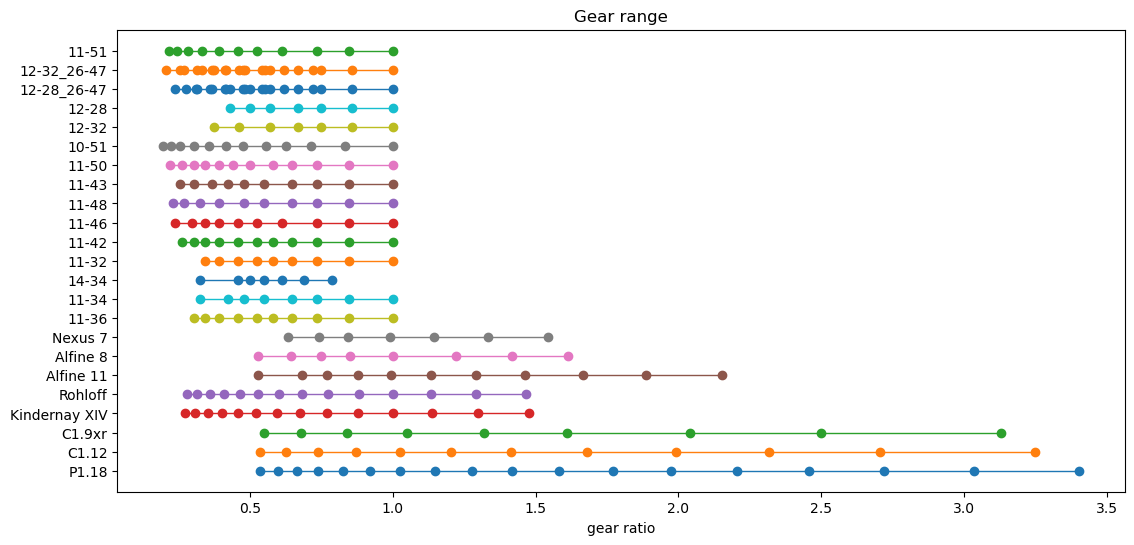

In [13]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.set_title('Gear range')
for i, gear_name in enumerate(gearboxes):
    gears = gearboxes[gear_name]
    ax.plot(gears, [i]*len(gears), lw=1, marker='o', label=gear_name)
ax.set_xlabel('gear ratio')
_ = ax.set_yticks(np.arange(len(gearboxes)), gearboxes.keys())

* Rohloff & Kindernay uses a gear range quite different from all the rest. Not very surprising considering they got gear ratio of 1 at gear 11... It should result in quite different chainwheel/rear sporket configurations.
* The initial comparision can be improved by normalizing all graphs to start from 1, so let's do it.

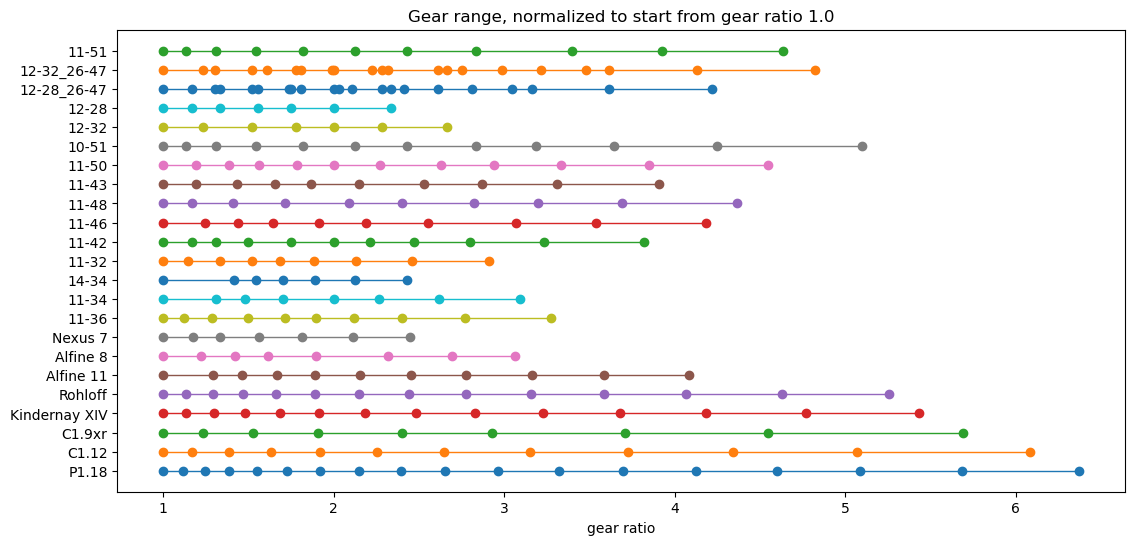

In [14]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.set_title('Gear range, normalized to start from gear ratio 1.0')
for i, gear_name in enumerate(gearboxes):
    gears = gearboxes[gear_name]
    ax.plot(gears/gears[0], [i]*len(gears), lw=1, marker='o', label=gear_name)
ax.set_xlabel('gear ratio')
_ = ax.set_yticks(np.arange(len(gearboxes)), gearboxes.keys())

* C1.9xr has reeaaly large gear steps. Considering low price difference with C1.12 it is really no point using C1.9xr on [non-electric] bike.
* Gear steps of C1.12 are still quite large comparing to the rest. Huge range and only 12 gears.
* Kindernay XIV presents itself as slightly wider version of Rohloff.
* Range of Nexus 7 (available on many city/hybrid bikes) are really low, Alfine/Nexus 8 is better, but not that much.
* Alfine 11 is really Rohloff minus gears 2, 13 and 14.
* High first step on Alfine 11 is like 'ok, you can go up this hill if you really want, but maybe you will not be that comfortable climbing a bit less step hill'. I'm fine with this, at least in theory ;)
* Alfine 11 looks to be a really good option for the money. It covers 12 of 14 Rohloff gears for ~1000€ less. At least if one consider gear range only.
* I would assume that step irregularities not noticeable to eyes on this plot will not be noticeable for legs in practice.  

In [15]:
del gearboxes['C1.9xr']

### Definitions of known gear comparision systems

From [https://www.sheldonbrown.com/gain.html]

#### Gear inches
the diameter of the drive wheel, times the size of the front sprocket divided by the size of the rear sprocket
The lowest gear on most mountain bikes is around 22-26 inches. The highest gear on road racing bikes is usually around 108-110 inches.

#### Development
Development can be calculated by dividing the chainwheel size by the rear sprocket size, multiplying the result by the wheel diameter and by pi (3.1416).

#### Some random comments
The 17.2” bottom gear may seem very low, but it will enable you to spin at “an easy to keep your balance” 48.5 rpm when climbing very steep hills at 4kph (2.5mph)
gear ratios (in inches) 26” wheels
Ring x sprocket
38 x 16 Rohloff 17.2 19.5 22.2 25.3 28.7 32.6 37.1 42.1 47.8 54.4 61.8 70.1 79.8 90.6
 typical modern MTB set up, 22/32/44 chain rings and 11-34 cassette frequently recommended for use on expedition bikes (and many fast touring 26” wheel bikes)
16.8 19.1 22 24.9 27.7** 32 36.2 41.6 48.9 55.5 64** 67.3 76.3 88 104

In [16]:
# As bycicle tire sizes seem to be a little of a mess, diameter of the tires will be represented by a dictonary.
# Diameters are obtained by guessing after comparing tire circumference data from https://www.skeppshult.se/media/1140/techinfo-2015_gb.pdf
# and ETRTO (ISO) inner diameter + 2 * width. No warranty that numbers here are correct.

tire_diameter = {'29"x2.6':   770,
                 '60-622':    745, # cir 2340
                 '29"x2.25':  742, # cir 2330, aka 57-622
                 '57-622':    742,
                 '55-622':    735,
                 '29"x2.2':   735, # cir 2310+ 55-622
                 '27.5"x3':   734, # cir ???? aka 75-584 650B
                 '27.5"x2.8': 726, 
                 '50-622':    722, # cir 2280 aka 29" aka 28x1.9 aka 28x2.0 aka 29x2.0
                 '29"x2.0':   722, # cir 2280
                 '47-622':    716, # cir 2250 aka 28" aka 700x45c aka 28x1.75, 28x3/4, 28x1 5/8 x1 3/4
                 '27.5"x2.6': 714, # 65-584  
                 '42-622':    708, # cir 2230
                 '57-584':    705, # cir 2215
                 '40-622':    703, # cir 2220 aka 700c
                 '27.5"x2.2': 700, # cir 2195+ 55-584
                 '55-584':    700, # cir 2195+
                 '37-622':    690,
                 '27.5"x2.0': 684, #          aka 50-584 aka 650B
                 '50-559':    659, # cir 2075 aka 26" aka 26x2.0
                }

In [17]:
2.9*2.54, 622+34*2, #2240/np.pi

(7.366, 690)

In [18]:
@dataclass
class Bike:
    wheel: str
    rear_sporket: int
    chainwheel: int
    gearbox: str
        
    @staticmethod
    def development_to_gi(development):
        return development / (np.pi * 25.4)
        
    def development(self):
        """
        Calculate development in mm
        """
        return np.sort(np.pi * tire_diameter[self.wheel] * (gearboxes[self.gearbox] * np.atleast_2d(self.chainwheel).T).ravel() / self.rear_sporket)

    def gear_inches(self):
        """
        Calculate bike gear inches.
        """
        return Bike.development_to_gi(self.development()) 

In [47]:
bikes = {
'City bike Nexus 7': Bike(wheel='42-622', chainwheel=38, rear_sporket=20, gearbox='Nexus 7'),

"Idworx oPinion c1.12 35/39 50": Bike(wheel='50-622', chainwheel=35, rear_sporket=39, gearbox='C1.12'), # 109
"Idworx oPinion c1.12 35/39 55": Bike(wheel='55-622', chainwheel=35, rear_sporket=39, gearbox='C1.12'),

"Idworx oPinion c1.12 39/35 50": Bike(wheel='50-622', chainwheel=39, rear_sporket=35, gearbox='C1.12'),
"Idworx oPinion c1.12 39/35 55": Bike(wheel='55-622', chainwheel=39, rear_sporket=35, gearbox='C1.12'), # 140

"Idworx oPinion p1.18 35/39 50": Bike(wheel='50-622', chainwheel=35, rear_sporket=39, gearbox='P1.18'), # 109
"Idworx oPinion p1.18 35/39 55": Bike(wheel='55-622', chainwheel=35, rear_sporket=39, gearbox='P1.18'),

"Idworx oPinion p1.18 39/35 50": Bike(wheel='50-622', chainwheel=39, rear_sporket=35, gearbox='P1.18'),
"Idworx oPinion p1.18 39/35 55": Bike(wheel='55-622', chainwheel=39, rear_sporket=35, gearbox='P1.18'), # 140

"Idworx All Rohler 43/17 50": Bike(wheel='50-622', chainwheel=43, rear_sporket=17, gearbox='Rohloff'), # 159
"Idworx All Rohler 43/17 55": Bike(wheel='55-622', chainwheel=43, rear_sporket=17, gearbox='Rohloff'),

"Idworx All Rohler 50/19 50": Bike(wheel='50-622', chainwheel=50, rear_sporket=19, gearbox='Rohloff'),
"Idworx All Rohler 50/19 55": Bike(wheel='55-622', chainwheel=50, rear_sporket=19, gearbox='Rohloff'), #168

#'Poison Zyankali 29 Al11 2.2"': Bike(wheel='29"x2.2', chainwheel=, rear_sporket=, gearbox='Alfine 11'),
'Poison Zyankali 29 Tour Pinion Gates 32/28': Bike(wheel='29"x2.2', chainwheel=32, rear_sporket=28, gearbox='C1.12'),
'Poison Zyankali 29 Tour Pinion Gates 32/30': Bike(wheel='29"x2.2', chainwheel=32, rear_sporket=30, gearbox='C1.12'),
'Poison Zyankali 29 Tour Pinion Gates 32/32': Bike(wheel='29"x2.2', chainwheel=32, rear_sporket=32, gearbox='C1.12'),
'Poison Zyankali 29 Tour Pinion 30/21': Bike(wheel='29"x2.2', chainwheel=30, rear_sporket=21, gearbox='C1.12'),
'Poison Zyankali 29 Tour Pinion 30/26': Bike(wheel='29"x2.2', chainwheel=30, rear_sporket=26, gearbox='C1.12'),
'Poison Zyankali 29 Tour Pinion 24/21': Bike(wheel='29"x2.2', chainwheel=24, rear_sporket=21, gearbox='C1.12'),
    
'Olsen Oteopti 5': Bike(wheel='29"x2.25', chainwheel=39, rear_sporket=24, gearbox='Alfine 11'),
'Trenga GLC 11': Bike(wheel='40-622', chainwheel=46, rear_sporket=24, gearbox='Alfine 11'),
'Trenga GLC 9': Bike(wheel='40-622', chainwheel=46, rear_sporket=24, gearbox='Alfine 8'),

'Alfine 11 min 60': Bike(wheel='60-622', chainwheel=28, rear_sporket=20, gearbox='Alfine 11'),
'Alfine 11 min 50': Bike(wheel='50-622', chainwheel=28, rear_sporket=20, gearbox='Alfine 11'),
'Alfine 11 32x23 50': Bike(wheel='50-622', chainwheel=32, rear_sporket=23, gearbox='Alfine 11'), # https://www.mtbr.com/threads/planning-on-putting-alfine-11-on-early-salsa-fargo-general-advice.984720/

'Alfine 11 min 27.5': Bike(wheel='27.5"x2.2', chainwheel=28, rear_sporket=20, gearbox='Alfine 11'),

'Alfine 11 min46 60': Bike(wheel='60-622', chainwheel=46, rear_sporket=28, gearbox='Alfine 11'),
'Alfine 11 min46 27.5': Bike(wheel='27.5"x2.2', chainwheel=46, rear_sporket=28, gearbox='Alfine 11'),
    
'Cube AIM SLX': Bike(wheel='29"x2.25', chainwheel=[22, 36], rear_sporket=11, gearbox='11-36'),
'Cube Travel Pro': Bike(wheel='55-622', chainwheel=46, rear_sporket=22, gearbox='Alfine 8'),
'Cube Travel Pro Al8 46-26': Bike(wheel='55-622', chainwheel=46, rear_sporket=26, gearbox='Alfine 8'),
'Cube Travel Pro Al8 46-28': Bike(wheel='55-622', chainwheel=46, rear_sporket=28, gearbox='Alfine 8'),
'Cube Travel Pro Al8 28-20': Bike(wheel='55-622', chainwheel=28, rear_sporket=20, gearbox='Alfine 8'),
'Cube Travel Pro Alfine 11': Bike(wheel='55-622', chainwheel=46, rear_sporket=22, gearbox='Alfine 11'),
'Cube Travel Pro Al11 46-26': Bike(wheel='55-622', chainwheel=46, rear_sporket=26, gearbox='Alfine 11'),
'Cube Travel Pro Al11 46-28': Bike(wheel='55-622', chainwheel=46, rear_sporket=28, gearbox='Alfine 11'),
'Cube Travel Pro Al11 28-20': Bike(wheel='55-622', chainwheel=28, rear_sporket=20, gearbox='Alfine 11'),
'Cube Travel Pro Kindernay': Bike(wheel='55-622', chainwheel=46, rear_sporket=22, gearbox='Kindernay XIV'),
'Cube Travel Pro Rohloff': Bike(wheel='55-622', chainwheel=46, rear_sporket=22, gearbox='Rohloff'),
'Cube Travel SLX': Bike(wheel='37-622', chainwheel=46, rear_sporket=22, gearbox='Alfine 11'),
    
'Salsa Fargo Apex 1': Bike(wheel='29"x2.2', chainwheel=32, rear_sporket=11, gearbox='11-42'),
'Salsa Fargo Rohloff': Bike(wheel='29"x2.2', chainwheel=46, rear_sporket=22, gearbox='Rohloff'),
    
'Bombtrack Beyond+': Bike(wheel='27.5"x2.8', chainwheel=30, rear_sporket=11, gearbox='11-50'),
'Kona Unit X': Bike(wheel='29"x2.6', chainwheel=32, rear_sporket=10, gearbox='10-51'),
'Kona Unit Rohloff': Bike(wheel='29"x2.6', chainwheel=32, rear_sporket=17, gearbox='Rohloff'),

'MCBike 32': Bike(wheel='50-559', chainwheel=[28, 38, 48], rear_sporket=12, gearbox='12-32'),
'MCBike 14-34': Bike(wheel='50-559', chainwheel=[28, 38, 48], rear_sporket=12, gearbox='14-34'),
'MCBike 14-34x28': Bike(wheel='50-559', chainwheel=[28], rear_sporket=12, gearbox='14-34'),
'MCBike 14-34x38': Bike(wheel='50-559', chainwheel=[38], rear_sporket=12, gearbox='14-34'),
'MCBike 14-34x48': Bike(wheel='50-559', chainwheel=[48], rear_sporket=12, gearbox='14-34'),

'MCBike 38-32': Bike(wheel='50-559', chainwheel=38, rear_sporket=12, gearbox='12-32'),
'MCBike 28': Bike(wheel='50-559', chainwheel=[28, 38, 48], rear_sporket=12, gearbox='12-28'),
'MCBike 28x28': Bike(wheel='50-559', chainwheel=[28], rear_sporket=12, gearbox='12-28'),
'MCBike 28x38': Bike(wheel='50-559', chainwheel=[38], rear_sporket=12, gearbox='12-28'),
'MCBike 28x48': Bike(wheel='50-559', chainwheel=[48], rear_sporket=12, gearbox='12-28'),
'MCBike 38-28': Bike(wheel='50-559', chainwheel=38, rear_sporket=12, gearbox='12-28'),
'MCBike 11-43 x3': Bike(wheel='50-559', chainwheel=[28, 38, 48], rear_sporket=11, gearbox='11-43'),
'MCBike 11-51 x3': Bike(wheel='50-559', chainwheel=[28, 38, 48], rear_sporket=11, gearbox='11-51'),
'MCBike Al8 x3': Bike(wheel='50-559', chainwheel=[28, 38, 48], rear_sporket=22, gearbox='Alfine 8'),
'MCBike Al11 x3': Bike(wheel='50-559', chainwheel=[28, 38, 48], rear_sporket=22, gearbox='Alfine 11'),
'MCBike Al11x28': Bike(wheel='50-559', chainwheel=[28], rear_sporket=22, gearbox='Alfine 11'),
'MCBike Al11x38': Bike(wheel='50-559', chainwheel=[38], rear_sporket=22, gearbox='Alfine 11'),
'MCBike Al11x48': Bike(wheel='50-559', chainwheel=[48], rear_sporket=22, gearbox='Alfine 11'),
'MCBike Rohloff x3': Bike(wheel='50-559', chainwheel=[28, 38, 48], rear_sporket=22, gearbox='Rohloff'),
'MCBike 11-48x28': Bike(wheel='50-559', chainwheel=[28], rear_sporket=11, gearbox='11-48'),
'MCBike 11-48x38': Bike(wheel='50-559', chainwheel=[38], rear_sporket=11, gearbox='11-48'),
'MCBike 11-48x48': Bike(wheel='50-559', chainwheel=[48], rear_sporket=11, gearbox='11-48'),

'MCBike 11-46x28': Bike(wheel='50-559', chainwheel=[28], rear_sporket=11, gearbox='11-46'),
'MCBike 11-46x38': Bike(wheel='50-559', chainwheel=[38], rear_sporket=11, gearbox='11-46'),
'MCBike 11-46x48': Bike(wheel='50-559', chainwheel=[48], rear_sporket=11, gearbox='11-46'),
    
    
'MCBike 11-43 28': Bike(wheel='50-559', chainwheel=28, rear_sporket=11, gearbox='11-43'),
'MCBike 11-43 38': Bike(wheel='50-559', chainwheel=38, rear_sporket=11, gearbox='11-43'),
'MCBike 11-43 48': Bike(wheel='50-559', chainwheel=48, rear_sporket=11, gearbox='11-43'),

'MCBike 11-51 28': Bike(wheel='50-559', chainwheel=28, rear_sporket=11, gearbox='11-51'),
'MCBike 11-51 38': Bike(wheel='50-559', chainwheel=38, rear_sporket=11, gearbox='11-51'),
'MCBike 11-51 48': Bike(wheel='50-559', chainwheel=48, rear_sporket=11, gearbox='11-51'),

'MCBike Al8 38': Bike(wheel='50-559', chainwheel=38, rear_sporket=22, gearbox='Alfine 8'),
'MCBike Al11 38': Bike(wheel='50-559', chainwheel=38, rear_sporket=22, gearbox='Alfine 11'),
'MCBike Rohloff 38': Bike(wheel='50-559', chainwheel=38, rear_sporket=22, gearbox='Rohloff'),

    
'Cube Nature': Bike(wheel='50-622', chainwheel=[26, 36, 48], rear_sporket=11, gearbox='11-34'),
'Cube Nature 11-43': Bike(wheel='50-622', chainwheel=[26, 36, 48], rear_sporket=11, gearbox='11-43'),

    'Bergamont Vittese 6': Bike(wheel='50-622', chainwheel=[26, 36, 48], rear_sporket=11, gearbox='11-32'),
}

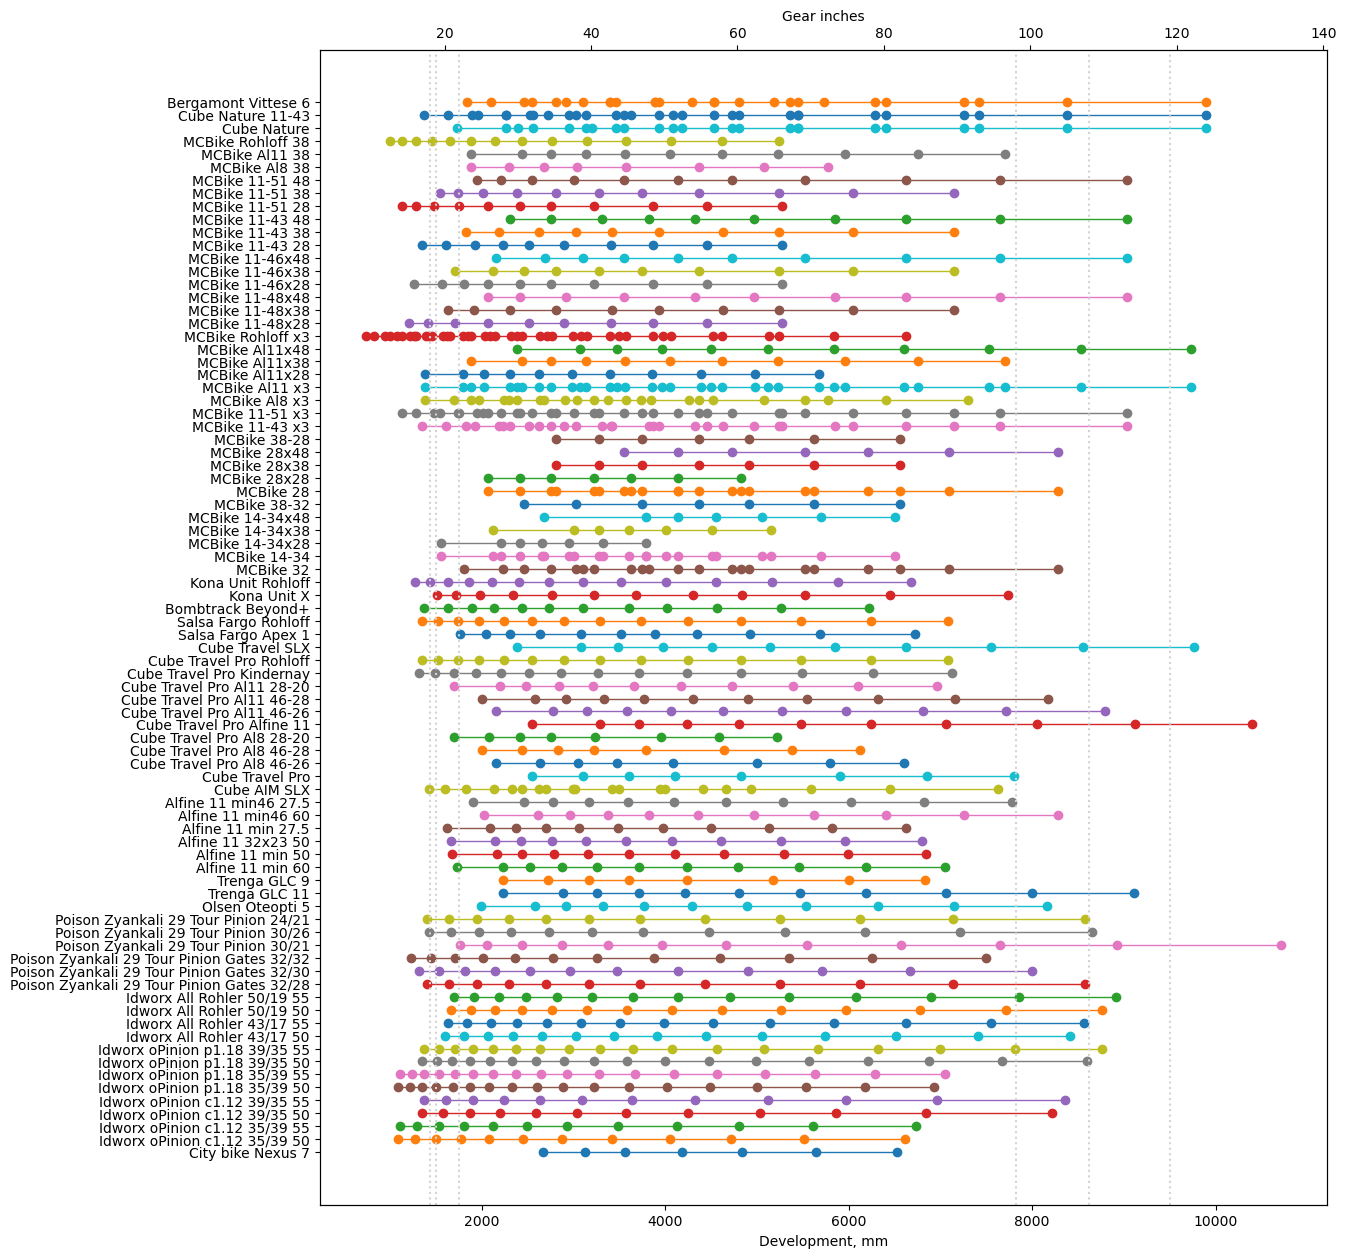

In [48]:
def add_gi_axis(ax):
    twin = ax.twiny()
    twin.set_xlabel('Gear inches')
    twin.axvline(18, ls=':', color='lightgray')
    twin.axvline(22, ls=':', color='lightgray')
    twin.axvline(98, ls=':', color='lightgray')
    twin.axvline(108, ls=':', color='lightgray')
    twin.set_xlim(Bike.development_to_gi(np.array(ax.get_xlim())))

fig, ax = plt.subplots(figsize=(13, 15))
for i, bike in enumerate(bikes):
    development = bikes[bike].development()
    ax.plot(development, [i]*len(development), lw=1, marker='o', label=bike)
ax.set_xlabel('Development, mm')
_ = ax.set_yticks(np.arange(len(bikes)), bikes.keys())
ax.axvline(1500, ls=':', color='lightgray')
ax.axvline(9500, ls=':', color='lightgray')
add_gi_axis(ax)


In [30]:
repr(list(bikes))

"['City bike Nexus 7', 'Idworx oPinion c1.12 35/39 50', 'Idworx oPinion c1.12 35/39 55', 'Idworx oPinion c1.12 39/35 50', 'Idworx oPinion c1.12 39/35 55', 'Idworx oPinion p1.18 35/39 50', 'Idworx oPinion p1.18 35/39 55', 'Idworx oPinion p1.18 39/35 50', 'Idworx oPinion p1.18 39/35 55', 'Idworx All Rohler 43/17 50', 'Idworx All Rohler 43/17 55', 'Idworx All Rohler 50/19 50', 'Idworx All Rohler 50/19 55', 'Poison Zyankali 29 Tour Pinion Gates 32/28', 'Poison Zyankali 29 Tour Pinion Gates 32/30', 'Poison Zyankali 29 Tour Pinion Gates 32/32', 'Poison Zyankali 29 Tour Pinion 30/21', 'Poison Zyankali 29 Tour Pinion 30/26', 'Poison Zyankali 29 Tour Pinion 24/21', 'Olsen Oteopti 5', 'Trenga GLC 11', 'Trenga GLC 9', 'Alfine 11 min 60', 'Alfine 11 min 50', 'Alfine 11 32x23 50', 'Alfine 11 min 27.5', 'Alfine 11 min46 60', 'Alfine 11 min46 27.5', 'Cube AIM SLX', 'Cube Travel Pro', 'Cube Travel Pro Al8 46-26', 'Cube Travel Pro Al8 46-28', 'Cube Travel Pro Al8 28-20', 'Cube Travel Pro Alfine 11', 'C

In [31]:
groups = {
    'Idworx oPinion p1.18': [bikes['Idworx oPinion p1.18 35/39 50'], bikes['Idworx oPinion p1.18 39/35 55']],
    'Idworx oPinion c1.12': [bikes['Idworx oPinion c1.12 35/39 50'], bikes['Idworx oPinion c1.12 39/35 55']],
    'Poison Zyankali 29 Tour Pinion Gates': [bikes['Poison Zyankali 29 Tour Pinion Gates 32/32'], bikes['Poison Zyankali 29 Tour Pinion Gates 32/28']],
    'Kona Unit Rohloff': [bikes['Kona Unit Rohloff']],
    'Salsa Fargo Rohloff': [bikes['Salsa Fargo Rohloff']],
    'Bombtrack Beyound+': [bikes['Bombtrack Beyond+']],
    'Poison Zyankali 29 Tour Pinion': [bikes['Poison Zyankali 29 Tour Pinion 24/21'], bikes['Poison Zyankali 29 Tour Pinion 30/21']],
    'Cube AIM SLX': [bikes['Cube AIM SLX']],
    'Kona Unit X': [bikes['Kona Unit X']],
    'Idworx All Rohler': [bikes['Idworx All Rohler 43/17 50'], bikes['Idworx All Rohler 50/19 55']],
    'Alfine 11 min': [bikes['Alfine 11 min 27.5'], bikes['Alfine 11 min 60']],
    'Cube Nature': [bikes['Cube Nature']],
    'Salsa Fargo Apex 1': [bikes['Salsa Fargo Apex 1']],
    'Bergamont Vittese 6': [bikes['Bergamont Vittese 6']],
    'MCBike': [bikes['MCBike 28']],
    'Alfine 11 min46 27.5': [bikes['Alfine 11 min46 27.5'], bikes['Alfine 11 min46 60']],
    'Olsen Oteopti 5': [bikes['Olsen Oteopti 5']],
    'Trenga GLC 11': [bikes['Trenga GLC 11']],
    'Trenga GLC 9': [bikes['Trenga GLC 9']],
    'Cube Travel SLX': [bikes['Cube Travel SLX']],
    'Cube Travel Pro': [bikes['Cube Travel Pro']],
    'City bike Nexus 7' : [bikes['City bike Nexus 7']],   
}

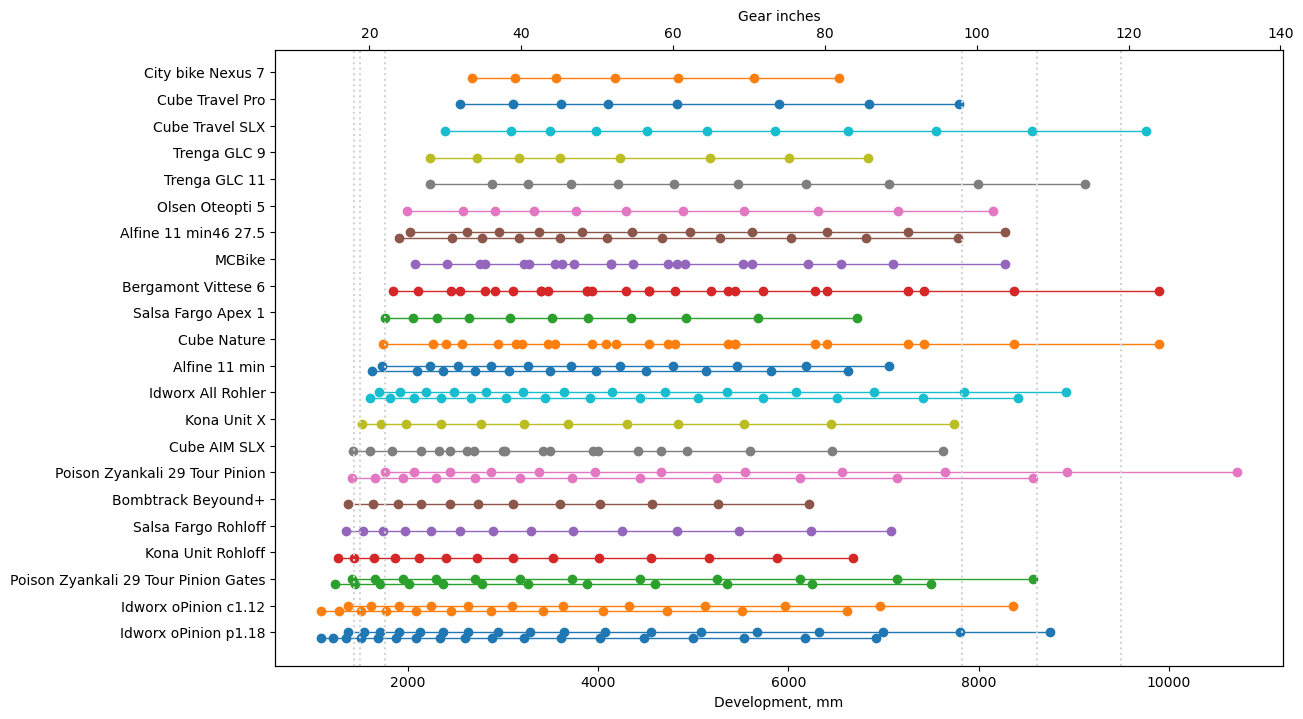

In [32]:

def plot_group(ax, pos, group, group_width):
    step = group_width / len(group)
    pos -= group_width / 2
    color = None
    for i, bike in enumerate(group):
        development = bike.development()
        color=ax.plot(development, [pos+i*step]*len(development), lw=1, marker='o', label=bike, **({'color':color} if color else {}))[0].get_color()

def plot_groups(groups, group_width = 0.4):
    fig, ax = plt.subplots(figsize=(13, 8))

    for i, name in enumerate(groups):
        plot_group(ax, i, groups[name], group_width)

    ax.set_xlabel('Development, mm')
    ax.set_yticks(np.arange(len(groups)), groups.keys())
    ax.axvline(1500, ls=':', color='lightgray')
    ax.axvline(9500, ls=':', color='lightgray')
    add_gi_axis(ax)
    
plot_groups(groups)

In [33]:
def speed(development, rpm):
    # RPM * development = mm/min
    # RPM * development * 60 / 1000 / 1000 = km/h
    return rpm * development * 60 / 1000000

 a good minimum cadence for climbing steep hills is around 60RPM. https://www.cyclingabout.com/hills-are-not-harder-says-science/
 max rpm - 100
 Recreational and utility cyclists typically cycle around 60–80 rpm. / https://en.wikipedia.org/wiki/Cadence_(cycling)

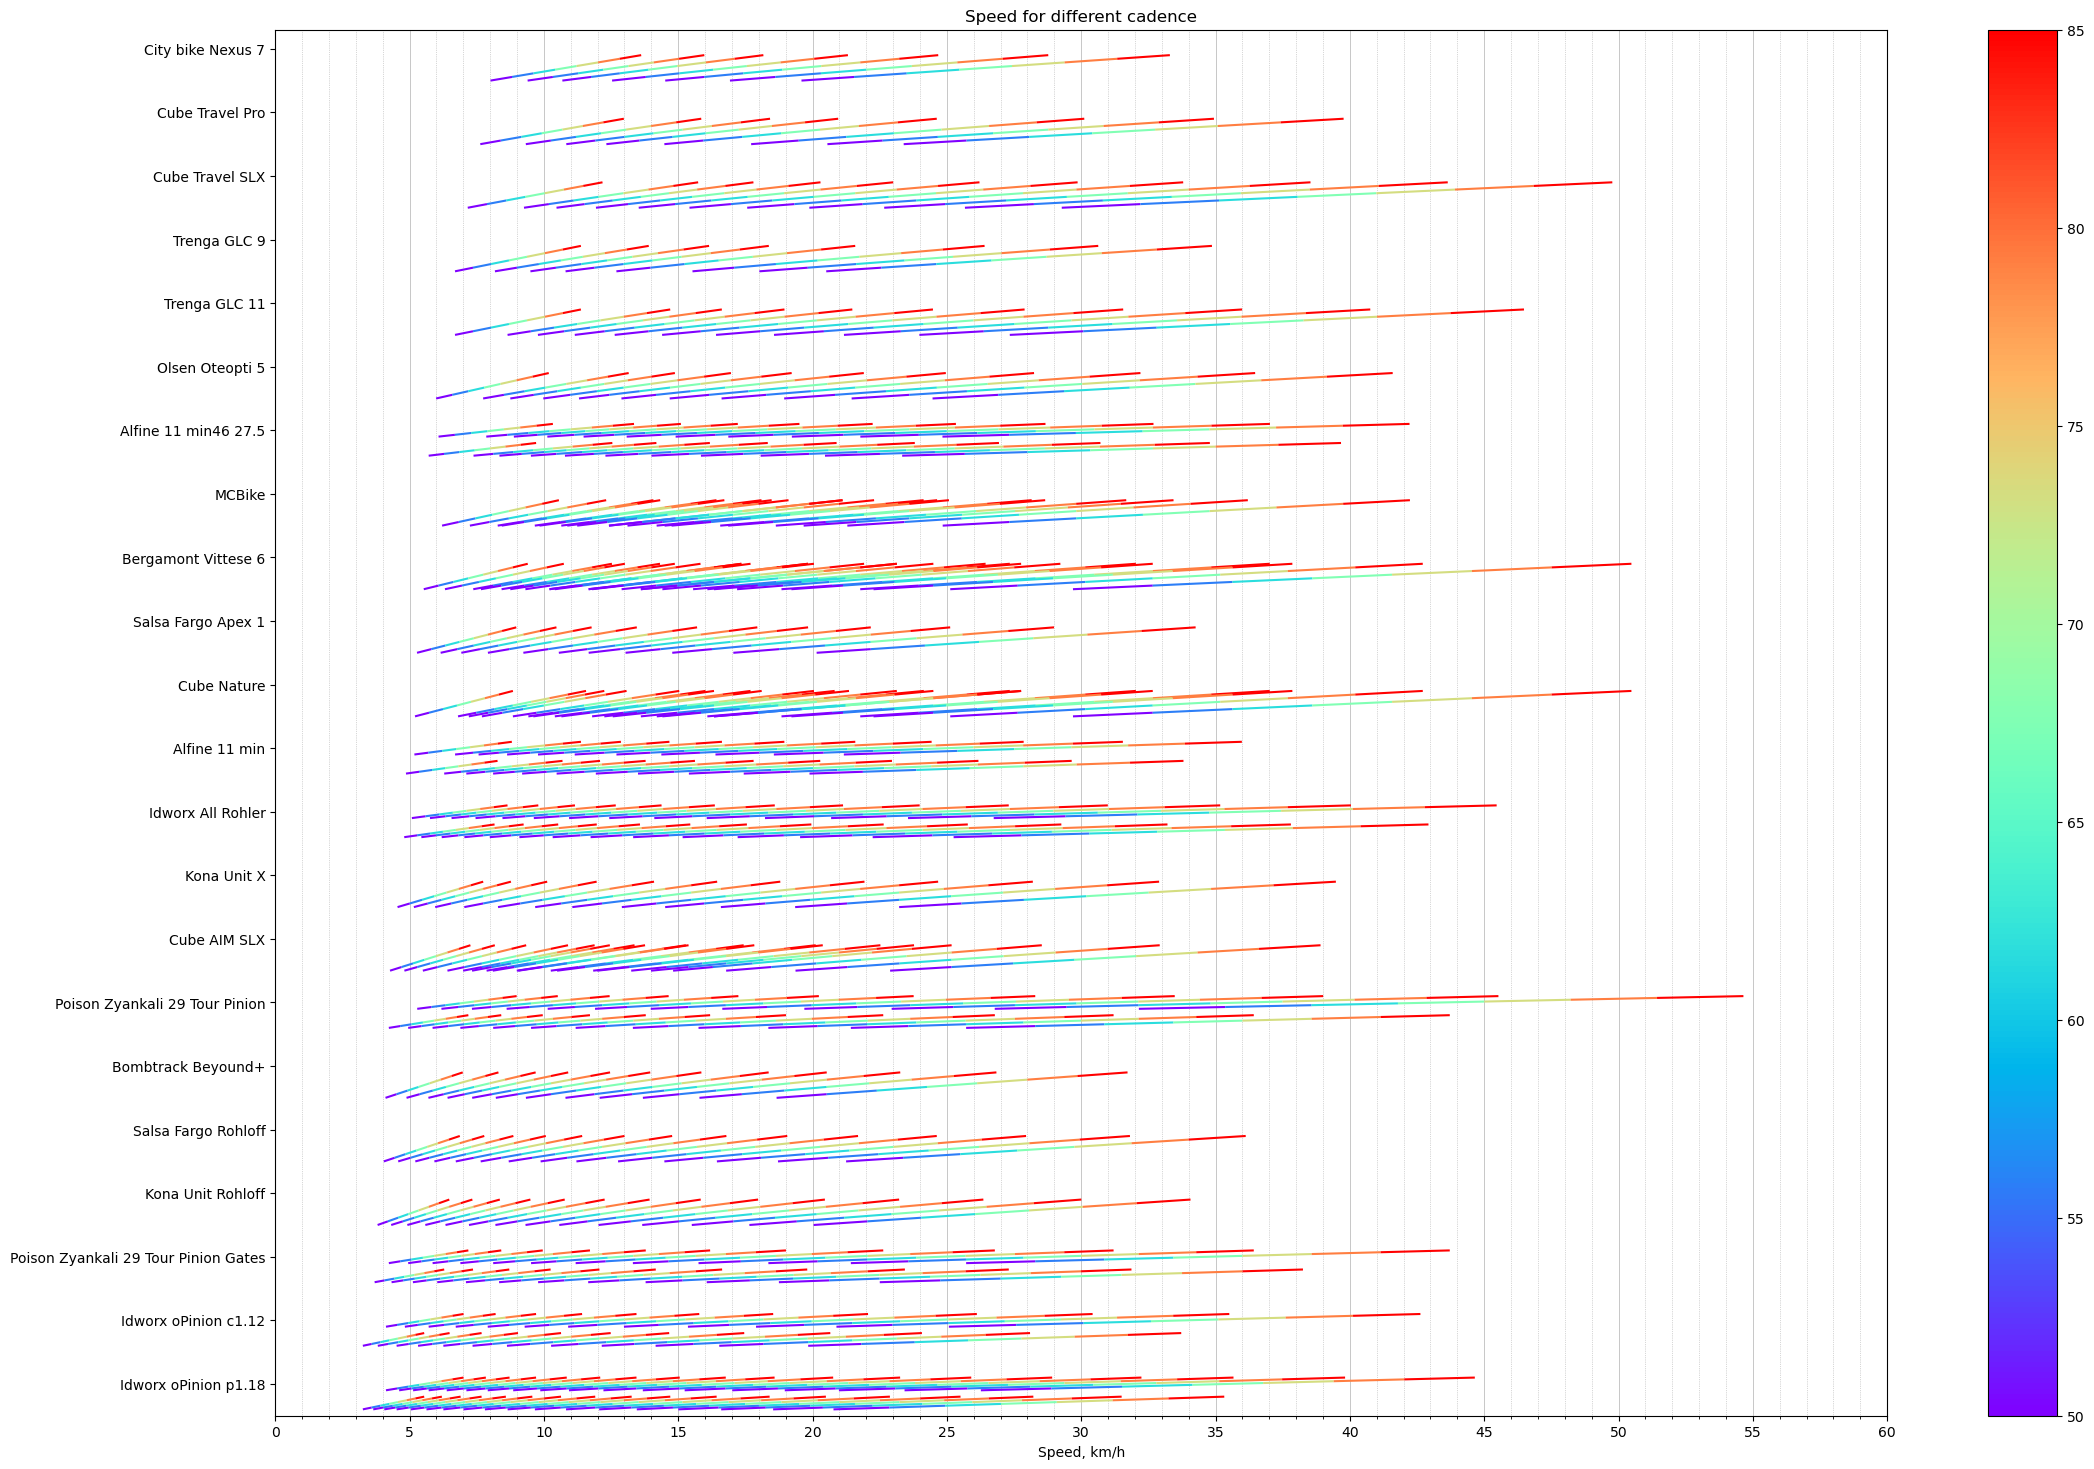

In [52]:
def plot_group_speed(ax, pos, group, group_width, rpm):
    step = group_width / len(group)
    pos -= group_width / 2
    for i, bike in enumerate(group):
        development = bike.development()
        xs = speed(np.atleast_2d(development).T, rpm)
        y = pos+i*step
        ys = np.linspace(y - step/3, y + step/3, len(rpm))
        segments = [((x0, y0), (x1, y1)) for x in xs for x0, x1, y0, y1 in zip(x[:-1], x[1:], ys[:-1], ys[1:])]
        lines = mcoll.LineCollection(segments, cmap='rainbow') #Dark2
        lines.set_array(list(np.linspace(rpm[0], rpm[-1], len(rpm)-1)) * len(development))
        ax.add_collection(lines)
        
    return lines

def plot_speed(groups, group_width = 0.6):
    fig, ax = plt.subplots(figsize=(26, 18))
    ax.set_title('Speed for different cadence')
    rpm = np.linspace(50, 85, 8)
    for i, name in enumerate(groups):
        l=plot_group_speed(ax, i, groups[name], group_width, rpm)

    ax.set_xlabel('Speed, km/h')
    ax.set_yticks(np.arange(len(groups)), groups.keys())
    #ax.axvline(speed(1500, rpm[0]), ls=':', color='lightgray')
    #ax.axvline(speed(1500, rpm[-1]), ls=':', color='lightgray')
    #ax.axvline(speed(9500, rpm[0]), ls=':', color='lightgray')
    #ax.axvline(speed(9500, rpm[-1]), ls=':', color='lightgray')
    ax.set_xlim(0, 60)
    ax.set_ylim(-0.5, len(groups)-0.7)
    ax.set_xticks(np.arange(0, 61, 1), minor=True)
    ax.set_xticks(np.arange(0, 65, 5), minor=False)
    ax.grid(which='minor', axis='x', ls=':', lw=0.5)
    ax.grid(which='major', axis='x', ls='-', lw=0.5)
    _=plt.colorbar(l)

plot_speed(groups)

In [35]:
bikes.keys()

dict_keys(['City bike Nexus 7', 'Idworx oPinion c1.12 35/39 50', 'Idworx oPinion c1.12 35/39 55', 'Idworx oPinion c1.12 39/35 50', 'Idworx oPinion c1.12 39/35 55', 'Idworx oPinion p1.18 35/39 50', 'Idworx oPinion p1.18 35/39 55', 'Idworx oPinion p1.18 39/35 50', 'Idworx oPinion p1.18 39/35 55', 'Idworx All Rohler 43/17 50', 'Idworx All Rohler 43/17 55', 'Idworx All Rohler 50/19 50', 'Idworx All Rohler 50/19 55', 'Poison Zyankali 29 Tour Pinion Gates 32/28', 'Poison Zyankali 29 Tour Pinion Gates 32/30', 'Poison Zyankali 29 Tour Pinion Gates 32/32', 'Poison Zyankali 29 Tour Pinion 30/21', 'Poison Zyankali 29 Tour Pinion 30/26', 'Poison Zyankali 29 Tour Pinion 24/21', 'Olsen Oteopti 5', 'Trenga GLC 11', 'Trenga GLC 9', 'Alfine 11 min 60', 'Alfine 11 min 50', 'Alfine 11 32x23 50', 'Alfine 11 min 27.5', 'Alfine 11 min46 60', 'Alfine 11 min46 27.5', 'Cube AIM SLX', 'Cube Travel Pro', 'Cube Travel Pro Al8 46-26', 'Cube Travel Pro Al8 46-28', 'Cube Travel Pro Al8 28-20', 'Cube Travel Pro Alfin

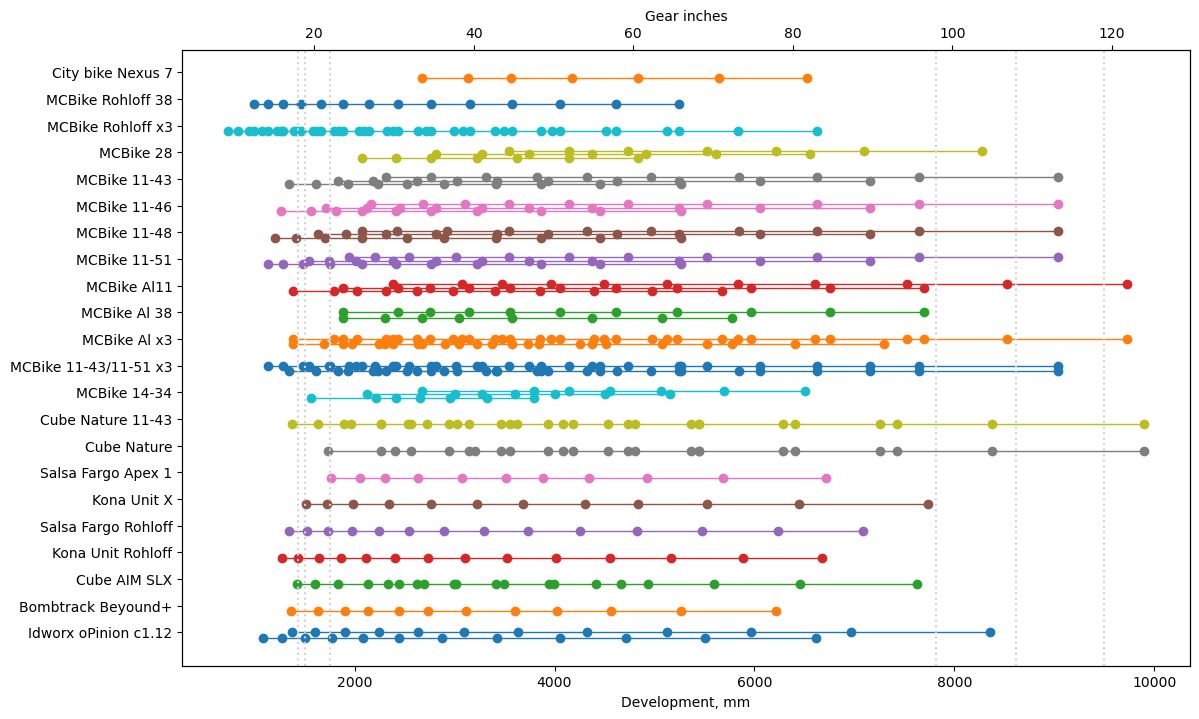

In [49]:
cube_experiments = {
    'Idworx oPinion c1.12': [bikes['Idworx oPinion c1.12 35/39 50'], bikes['Idworx oPinion c1.12 39/35 55']],
    'Bombtrack Beyound+': [bikes['Bombtrack Beyond+']],
    'Cube AIM SLX': [bikes['Cube AIM SLX']],
    'Kona Unit Rohloff': [bikes['Kona Unit Rohloff']],
    'Salsa Fargo Rohloff': [bikes['Salsa Fargo Rohloff']],
    'Kona Unit X': [bikes['Kona Unit X']],
    'Salsa Fargo Apex 1': [bikes['Salsa Fargo Apex 1']],
    'Cube Nature': [bikes['Cube Nature']],
    'Cube Nature 11-43': [bikes['Cube Nature 11-43']],
    'MCBike 14-34': [bikes['MCBike 14-34x28'], bikes['MCBike 14-34x38'], bikes['MCBike 14-34x48']],
    'MCBike 11-43/11-51 x3': [bikes['MCBike 11-43 x3'], bikes['MCBike 11-51 x3']],
    'MCBike Al x3': [bikes['MCBike Al8 x3'], bikes['MCBike Al11 x3']],
    'MCBike Al 38': [bikes['MCBike Al8 38'], bikes['MCBike Al11 38']],
    'MCBike Al11': [bikes['MCBike Al11x28'], bikes['MCBike Al11x38'], bikes['MCBike Al11x48']],
    'MCBike 11-51': [bikes['MCBike 11-51 28'], bikes['MCBike 11-51 38'], bikes['MCBike 11-51 48']],
    'MCBike 11-48': [bikes['MCBike 11-48x28'], bikes['MCBike 11-48x38'], bikes['MCBike 11-48x48']],
    'MCBike 11-46': [bikes['MCBike 11-46x28'], bikes['MCBike 11-46x38'], bikes['MCBike 11-46x48']],
    'MCBike 11-43': [bikes['MCBike 11-43 28'], bikes['MCBike 11-43 38'], bikes['MCBike 11-43 48']],
    'MCBike 28': [bikes['MCBike 28x28'], bikes['MCBike 28x38'], bikes['MCBike 28x48']],
    
    'MCBike Rohloff x3': [bikes['MCBike Rohloff x3']],
    'MCBike Rohloff 38': [bikes['MCBike Rohloff 38']],
    'City bike Nexus 7' : [bikes['City bike Nexus 7']],
}

plot_groups(cube_experiments)

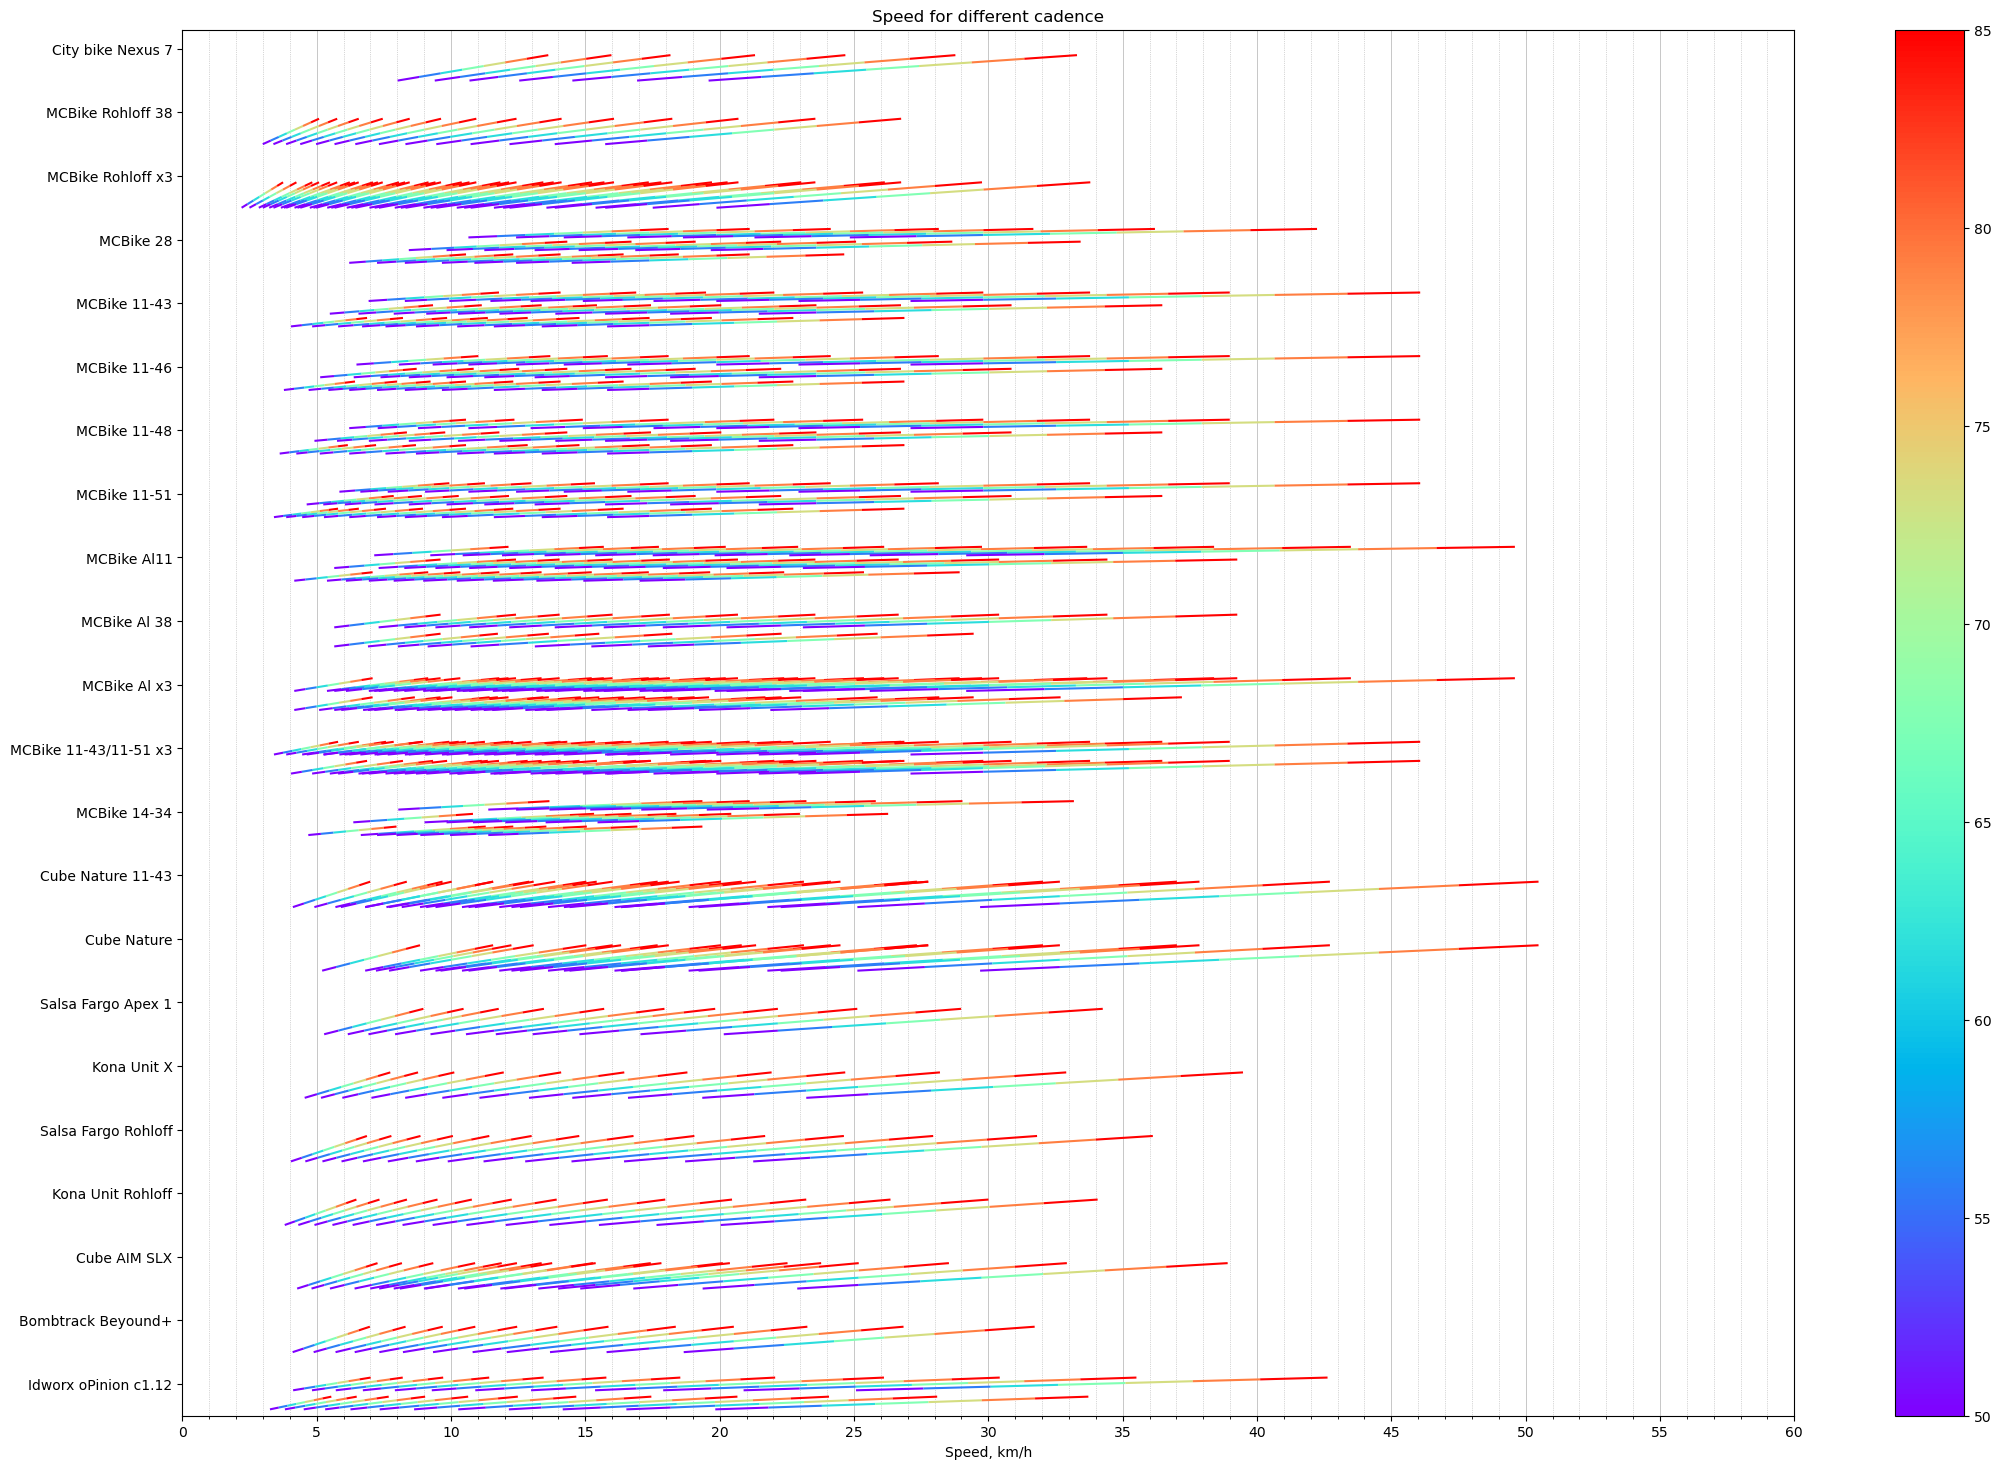

In [53]:
plot_speed(cube_experiments)

Cycle Monkey secondary gear ratios for Pinion:

0.95 - 1.2 Mountian, fat, heavy off-road touring

1.05 - 1.25 off-road bikepacking

1.1 - 1.3 on-road touring

1.2 - 1.4 on-road bikepacking, commuting, gravel riding

1.3 - 1.5 road, faster/more fit gravel rider